In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome100k.csv')
sequences = input_data_ordered_raw['seq'].tolist()

In [2]:
input_data_ordered_raw.head()

,Unnamed: 0,val,seq,left,right,ori,contig
0,0,23.9083,CTATTACCTGCCCACGGTAAAGGCGTTCTGGTTGCCCTACG,3695629,3695669,+,MG1655.fa
1,1,23.5831,TTTCTGCCCGCGGCCTGGCAATTGATACCGCCTTGCCATCG,1109059,1109099,+,MG1655.fa
2,2,23.4205,TTTTTACACGCCTTGCGTAAAGCGGCACGGCGCGGGGTGCG,822216,822256,-,MG1655.fa
3,3,23.4098,TTGCTGCCTGGCCGATGGTCTATGCCGCTGCGTTCTCCGGC,772478,772518,+,MG1655.fa
4,4,23.3640,CTTTTACACGCAAAATGCCGTCACGTTCACGGGTCTGGGCT,2748531,2748571,+,MG1655.fa


## Randomly sample vals and seqs to prevent data imbalance

In [3]:
input_data_ordered_raw[['val','seq']].head()

,val,seq
0,23.9083,CTATTACCTGCCCACGGTAAAGGCGTTCTGGTTGCCCTACG
1,23.5831,TTTCTGCCCGCGGCCTGGCAATTGATACCGCCTTGCCATCG
2,23.4205,TTTTTACACGCCTTGCGTAAAGCGGCACGGCGCGGGGTGCG
3,23.4098,TTGCTGCCTGGCCGATGGTCTATGCCGCTGCGTTCTCCGGC
4,23.3640,CTTTTACACGCAAAATGCCGTCACGTTCACGGGTCTGGGCT


In [4]:
# normally sample high value seqs more
# https://stackoverflow.com/questions/33160367/numpy-how-to-generate-a-normally-distributed-set-of-integers
bi = np.random.binomial(n=10000, p=0.01, size=1000)


In [5]:
num_sample = 40000   # number of training samples
test_size = 10000    # number of test samples

binomial_probability_parameter = 0.05

#index_random_sample_training_data = np.random.randint(100000,size=(9000))
index_random_sample_training_data = np.random.binomial(n=100000, p=binomial_probability_parameter, size=num_sample)
input_data_raw = input_data_ordered_raw[['val','seq']].loc[index_random_sample_training_data]
print(input_data_raw.head())

#index_random_sample_test_data = np.random.randint(100000,size=(1000))
index_random_sample_test_data = np.random.binomial(n=100000, p=binomial_probability_parameter, size=test_size)
input_data_raw_test = input_data_ordered_raw[['val','seq']].loc[index_random_sample_test_data]

print(input_data_raw_test.head())

          val                                        seq
5079  21.3489  TCTAAGCCTGCGCCCGGTAGTGAAGGCTACCGGGCTATTTC
4932  21.3627  CACCACCAGGACTTCTGGAGCAAACTGATGTCTTCCGCACG
5106  21.3466  ACCATCCCCGGGTTGATTGCCAATATGCAACGTTGCACTAA
5037  21.3519  CGCTAACATGGTTAAAATCTCCCGCTGGCGGGCGCTTAACG
4940  21.3618  CGACTCCCCGGAACGATGCCCGTCGCGTTGCGCTGCTCCTC
          val                                        seq
4944  21.3615  CCGCTGCTCGCTGTGGGGCTGGCAATTACCGGTGCGCTGGC
5029  21.3526  CCGCTTCACGCAGCAGGACTTTCCCTGCCGCCTGGTCAATC
5094  21.3475  CATGAACACGGTCAATGCTGCGGTGGTCGCCACGGTCGCGG
5022  21.3532  CTCTAACCCGGTGCCGGGTTCAATGGTCAGCGCCGTTCCGT
4990  21.3564  CCGATGCCCTGGTCACCAAGCCCCAGAATGCGTTCACCGTC


## Make positive and negative Labels

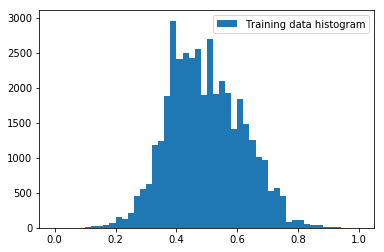

In [44]:
# positive and negative labels
# normalize the following between 0 and 1
pos_labels = np.array(input_data_raw['val'][0:num_sample])
pos_labels = (pos_labels-min(pos_labels))/(max(pos_labels)-min(pos_labels))

# test positive and negative labels
test_pos_labels = np.array(input_data_raw_test['val'][0:test_size])
test_pos_labels = (test_pos_labels-min(test_pos_labels))/(max(test_pos_labels)-min(test_pos_labels))

plt.hist(pos_labels,bins=50,label='Training data histogram')
plt.legend()
plt.show()
# assigned random values to negative examples

In [7]:
sequences = np.array(sequences)

pos = []
pos = list(sequences[index_random_sample_training_data])

test_pos = []
test_pos = list(sequences[index_random_sample_test_data])

pos = np.array(pos)
test_pos = np.array(test_pos)

seq_length = len(pos[0])

## One-hot encoding

In [8]:
temp_pos = []
temp_pos_test = []
for reshape_index in range(len(pos)):
    temp_pos.append(list(pos[reshape_index]))

for reshape_test_index in range(len(test_pos)):
    temp_pos_test.append(list(test_pos[reshape_test_index]))
    
pos = temp_pos
test_pos = temp_pos_test

In [9]:
pos = np.array(pos)
test_pos = np.array(test_pos)

In [10]:
pos_tensor = np.zeros(list(pos.shape) + [4])

test_pos_tensor = np.zeros(list(test_pos.shape) + [4])

base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

#naive one-hot encoding
for row in range(num_sample):
    for col in range(seq_length):
        pos_tensor[row,col,base_dict[pos[row,col]]] = 1
        if(row<test_size):
            test_pos_tensor[row,col,base_dict[test_pos[row,col]]] = 1

print('Positive sample matrix shape: {}'.format(pos.shape))
# this should be a 3D tensor with shape: (samples, steps, input_dim)
print('Positive sample tensor shape: {}'.format(pos_tensor.shape))

X = pos_tensor
y = pos_labels

X_test = test_pos_tensor
y_test = test_pos_labels

print('Training set shape: {}'.format(X.shape))
print('Training set label shape: {}'.format(y.shape))
print('\nOne-hot encoding looks like:\n {}'.format(X[0,0:10,:]))

Positive sample matrix shape: (40000, 41)
Positive sample tensor shape: (40000, 41, 4)
Training set shape: (40000, 41, 4)
Training set label shape: (40000,)

One-hot encoding looks like:
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


# Define error metrics

In [11]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

## Define Models

In [12]:
#here comes the deep learning part
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.activations import relu
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import SGD, Adam

#sanity check for dimensions
#print('Shape of the output of first layer: {}'.format(model.predict_on_batch(pos_tensor[0:1,:,:]).shape))

Using TensorFlow backend.


In [13]:

model = Sequential()
#model.add(Conv1D(1, 19, padding='same', input_shape=(seq_length, 4), activation='relu'))
model.add(Conv1D(10, 41, padding='same', input_shape=(seq_length, 4), activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(10, 20, padding='same', input_shape=(seq_length, 4), activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

#model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error',r_square])
#model.compile(loss='mean_squared_error',optimizer=sgd, metrics=[rmse,r_square])
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.0001), metrics=[rmse,r_square])

#history = model.fit(X, y, validation_split=0.2, epochs=50)  # starts training
history = model.fit(X, y, validation_split=0.3, epochs=100)  # starts training



Train on 28000 samples, validate on 12000 samples
Epoch 1/100
28000/28000 [==============================] - 4s 150us/step - loss: 0.0346 - rmse: 0.1414 - r_square: -1.4223 - val_loss: 0.0112 - val_rmse: 0.0791 - val_r_square: 0.1960
Epoch 2/100
28000/28000 [==============================] - 4s 144us/step - loss: 0.0152 - rmse: 0.0948 - r_square: -0.0605 - val_loss: 0.0063 - val_rmse: 0.0559 - val_r_square: 0.5599
Epoch 3/100
28000/28000 [==============================] - 4s 134us/step - loss: 0.0101 - rmse: 0.0750 - r_square: 0.3000 - val_loss: 0.0033 - val_rmse: 0.0312 - val_r_square: 0.7804
Epoch 4/100
28000/28000 [==============================] - 4s 128us/step - loss: 0.0074 - rmse: 0.0633 - r_square: 0.4921 - val_loss: 0.0024 - val_rmse: 0.0269 - val_r_square: 0.8436
Epoch 5/100
28000/28000 [==============================] - 3s 125us/step - loss: 0.0059 - rmse: 0.0558 - r_square: 0.5946 - val_loss: 0.0016 - val_rmse: 0.0186 - val_r_square: 0.8950
Epoch 6/100
28000/28000 [========

Epoch 44/100
28000/28000 [==============================] - 4s 126us/step - loss: 4.8126e-04 - rmse: 0.0154 - r_square: 0.9670 - val_loss: 3.6225e-04 - val_rmse: 0.0074 - val_r_square: 0.9788
Epoch 45/100
28000/28000 [==============================] - 4s 126us/step - loss: 4.6805e-04 - rmse: 0.0151 - r_square: 0.9681 - val_loss: 3.9899e-04 - val_rmse: 0.0084 - val_r_square: 0.9763
Epoch 46/100
28000/28000 [==============================] - 4s 126us/step - loss: 4.5614e-04 - rmse: 0.0150 - r_square: 0.9686 - val_loss: 3.3875e-04 - val_rmse: 0.0059 - val_r_square: 0.9806
Epoch 47/100
28000/28000 [==============================] - 4s 126us/step - loss: 4.5360e-04 - rmse: 0.0150 - r_square: 0.9689 - val_loss: 3.5125e-04 - val_rmse: 0.0064 - val_r_square: 0.9797
Epoch 48/100
28000/28000 [==============================] - 4s 126us/step - loss: 4.5207e-04 - rmse: 0.0149 - r_square: 0.9688 - val_loss: 3.7178e-04 - val_rmse: 0.0072 - val_r_square: 0.9782
Epoch 49/100
28000/28000 [==============

Epoch 87/100
28000/28000 [==============================] - 4s 140us/step - loss: 3.8207e-04 - rmse: 0.0135 - r_square: 0.9737 - val_loss: 2.7323e-04 - val_rmse: 0.0046 - val_r_square: 0.9846
Epoch 88/100
28000/28000 [==============================] - 4s 126us/step - loss: 3.7033e-04 - rmse: 0.0134 - r_square: 0.9745 - val_loss: 3.0217e-04 - val_rmse: 0.0066 - val_r_square: 0.9825
Epoch 89/100
28000/28000 [==============================] - 4s 127us/step - loss: 3.6555e-04 - rmse: 0.0133 - r_square: 0.9749 - val_loss: 2.8009e-04 - val_rmse: 0.0046 - val_r_square: 0.9843
Epoch 90/100
28000/28000 [==============================] - 4s 126us/step - loss: 3.7900e-04 - rmse: 0.0135 - r_square: 0.9740 - val_loss: 2.7965e-04 - val_rmse: 0.0052 - val_r_square: 0.9840
Epoch 91/100
28000/28000 [==============================] - 4s 127us/step - loss: 3.6115e-04 - rmse: 0.0132 - r_square: 0.9750 - val_loss: 2.9417e-04 - val_rmse: 0.0049 - val_r_square: 0.9834
Epoch 92/100
28000/28000 [==============

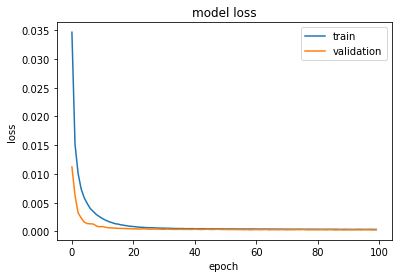

In [49]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [15]:
history.history.keys()

dict_keys(['val_loss', 'val_rmse', 'val_r_square', 'loss', 'rmse', 'r_square'])

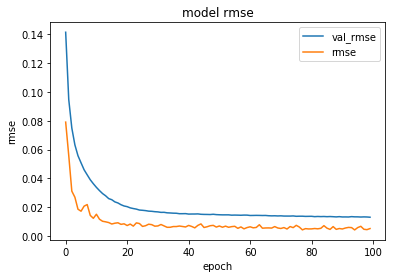

In [48]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('model rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['val_rmse', 'rmse'], loc='upper right')
plt.show()


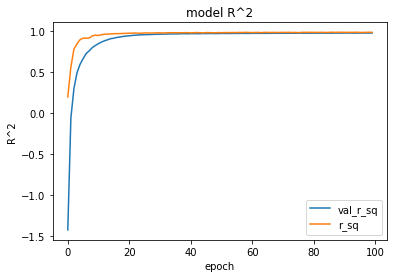

In [46]:
plt.plot(history.history['r_square'])
plt.plot(history.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['val_r_sq', 'r_sq'], loc='lower right')
plt.show()


In [18]:
#have a look at the filter
convlayer = model.layers[0]
weights = convlayer.get_weights()[0].squeeze()
print('Convolution parameter shape: {}'.format(weights.shape))

#num2seq = ['A','C','G','T']

#''.join([num2seq[np.argmax(weights[i,:])] for i in range(weights.shape[0])])
#test_pred = ''.join([num2seq[np.argmax(weights[i,:])] for i in range(weights.shape[0])])

Convolution parameter shape: (41, 4, 10)


## Make predictions

In [19]:
model_prediction = model.predict(X_test)

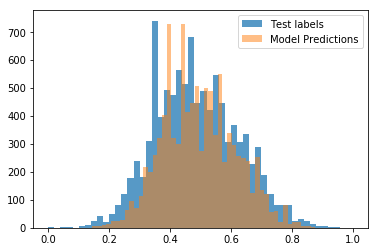

In [39]:
plt.hist(test_pos_labels,bins=50,alpha=0.75,label='Test labels')
plt.hist(model_prediction,bins=50,alpha=0.5,label='Model Predictions')
plt.legend()
plt.show()

In [21]:
pos_model_prediction = model.predict(test_pos_tensor)

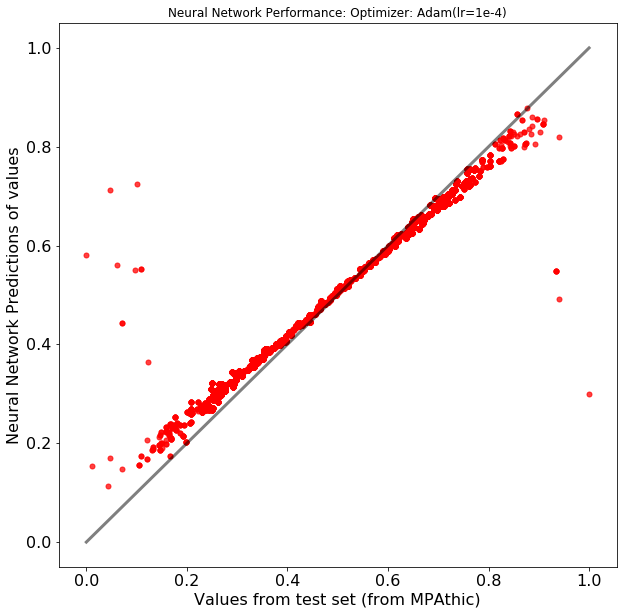

In [68]:
from pylab import rcParams
rcParams['xtick.labelsize'] = 16 
rcParams['ytick.labelsize'] = 16 
rcParams['figure.figsize'] = 10, 10

plt.scatter(y_test,pos_model_prediction,s=25,alpha=0.75,color='red')
plt.plot([0,1],alpha=0.5,linewidth=3,color='black')
plt.ylabel('Neural Network Predictions of values',fontsize=16)
plt.xlabel('Values from test set (from MPAthic)',fontsize=16)
plt.title('Neural Network Performance: Optimizer: Adam(lr=1e-4)')
plt.show()
